### Importing the libraries

In [1]:
import sys
from sklearn import datasets
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sb
from sklearn.naive_bayes import GaussianNB
import os
os.chdir(r"C:\Users\Mohammad.Rijwan\Documents\Transformer Project")
%matplotlib inline

### Importing the datasets

In [2]:
df=pd.read_csv("Annexure_1_result.csv")

In [45]:
df=df.drop(["Unnamed: 0"],axis=1)

In [48]:
df.head()

,Sample_number,Text_id,Sampled_date,T_site,T_plant,Sampling_point,CH4(ppm),H2(ppm),C2H2(ppm),C2H4(ppm),C2H6(ppm),CO(ppm),CO2(ppm),TDCG(ppm),Condition,Fault
0,10735333.0,OIL/NGP-DHC-SUB-55ETDC055001/011117@1159,11/28/2016 0:00,NMD,DHC_ELE_NMD,55ETDC055001_NMD,1.0,12.0,0.0,3.0,0.0,59.0,1619.0,75.0,Condition 1,No fault
1,10777576.0,OIL/NGU-IOP-ETP-SUB-80XD0011/141117@1801,11/28/2016 0:00,NMD,IWWTP_ELE_NMD,80XD0011_NMD,1.0,7.0,0.0,2.0,0.0,61.0,1634.0,71.0,Condition 1,No fault
2,10777591.0,OIL/NGU-IOP-ETP-SUB-80XD0012/141117@1801,11/28/2016 0:00,NMD,IWWTP_ELE_NMD,80XD0012_NMD,1.0,6.0,0.0,1.0,0.0,36.0,1514.0,44.0,Condition 1,No fault
3,10777595.0,OIL/NGU-IOP-ETP-SUB-80XD0013/141117@1801,11/28/2016 0:00,NMD,IWWTP_ELE_NMD,80XD0013_NMD,1.0,9.0,0.0,3.0,0.0,63.0,1172.0,76.0,Condition 1,No fault
4,10777600.0,OIL/NGU-IOP-ETP-SUB-80XD0014/141117@1801,11/28/2016 0:00,NMD,IWWTP_ELE_NMD,80XD0014_NMD,1.0,12.0,0.0,3.0,0.0,116.0,2206.0,132.0,Condition 1,No fault


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 16 columns):
Sample_number     319 non-null float64
Text_id           319 non-null object
Sampled_date      319 non-null object
T_site            319 non-null object
T_plant           319 non-null object
Sampling_point    319 non-null object
CH4(ppm)          319 non-null float64
H2(ppm)           319 non-null float64
C2H2(ppm)         319 non-null float64
C2H4(ppm)         319 non-null float64
C2H6(ppm)         319 non-null float64
CO(ppm)           319 non-null float64
CO2(ppm)          319 non-null float64
TDCG(ppm)         319 non-null float64
Condition         319 non-null object
Fault             319 non-null object
dtypes: float64(9), object(7)
memory usage: 40.0+ KB


In [47]:
df.describe()

,Sample_number,CH4(ppm),H2(ppm),C2H2(ppm),C2H4(ppm),C2H6(ppm),CO(ppm),CO2(ppm),TDCG(ppm)
count,3.190000e+02,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1.080189e+07,3.573668,15.714734,0.902821,12.793103,3.115987,136.573668,3007.996865,171.984326
std,6.442872e+04,7.108330,19.555520,3.402731,60.027204,15.568747,126.814330,1406.348784,153.856105
min,1.073533e+07,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,347.000000,17.000000
25%,1.077754e+07,1.000000,3.000000,0.000000,2.000000,0.000000,59.000000,1927.500000,75.500000
50%,1.078474e+07,2.000000,9.000000,0.000000,4.000000,0.000000,98.000000,2906.000000,127.000000
75%,1.079157e+07,3.000000,19.000000,0.000000,7.000000,1.000000,160.000000,3832.000000,195.000000
max,1.098826e+07,67.000000,125.000000,30.000000,922.000000,230.000000,997.000000,8810.000000,1250.000000


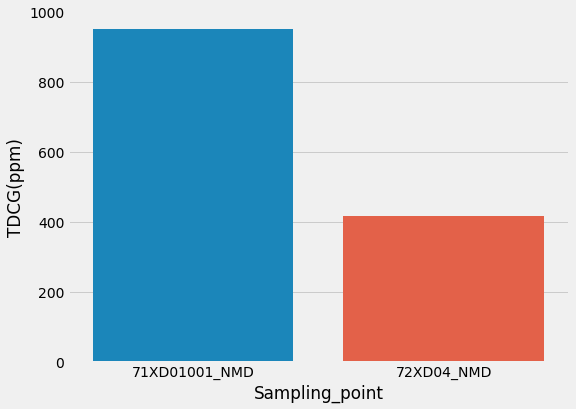

In [74]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
sb.barplot(x="Sampling_point",y="TDCG(ppm)",data=df[(df.Condition=='Condition 4')],ci=None)
plt.show()

In [12]:
predict_df=df.drop(["Unnamed: 0","Text_id","Sampled_date","T_site","T_plant","Sampling_point","Condition"],axis=1)

In [13]:
X=predict_df.drop(["Fault"],axis=1)
y=predict_df["Fault"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
model=[]
model.append(('LR',LogisticRegression()))
model.append(('LDA',LinearDiscriminantAnalysis()))
model.append(('KNN',KNeighborsClassifier()))
model.append(('DTC',DecisionTreeClassifier()))
model.append(('GNB',GaussianNB()))
model.append(('SVC',SVC()))

In [16]:
seed=6
scoring="accuracy"
for name,mod in model:
    kfold=KFold(n_splits=3,random_state=seed)
    cv_result=cross_val_score(mod,X_train,y_train,cv=kfold,scoring=scoring)
    print("Model: {}, Mean: {} and std: {}".format(name,cv_result.mean(),cv_result.std()))

Model: LR, Mean: 0.8655855855855856 and std: 0.03772269051589691
Model: LDA, Mean: 0.8967567567567567 and std: 0.02332480974096368
Model: KNN, Mean: 0.8341741741741742 and std: 0.04133432646799245
Model: DTC, Mean: 0.9371771771771771 and std: 0.0230650962567252
Model: GNB, Mean: 0.7891891891891891 and std: 0.013423121104280481
Model: SVC, Mean: 0.6415615615615615 and std: 0.04949029125564129


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [17]:
for name,mod in model:
    mod.fit(X_train,y_train)
    prediction=mod.predict(X_test)
    val=accuracy_score(y_test,prediction)
    print("The model is {} and Accuracy: {}".format(name,val))

The model is LR and Accuracy: 0.8854166666666666
The model is LDA and Accuracy: 0.9583333333333334
The model is KNN and Accuracy: 0.875
The model is DTC and Accuracy: 0.9583333333333334
The model is GNB and Accuracy: 0.7604166666666666
The model is SVC and Accuracy: 0.5729166666666666


In [18]:
X_test.head()

,Sample_number,CH4(ppm),H2(ppm),C2H2(ppm),C2H4(ppm),C2H6(ppm),CO(ppm),CO2(ppm),TDCG(ppm)
123,10770559.0,6.0,0.0,0.0,132.0,21.0,85.0,2769.0,244.0
110,10784795.0,3.0,55.0,4.0,22.0,0.0,82.0,2985.0,166.0
80,10777537.0,1.0,0.0,0.0,2.0,1.0,101.0,3122.0,105.0
131,10783459.0,0.0,0.0,0.0,0.0,0.0,31.0,771.0,31.0
132,10783474.0,0.0,0.0,0.0,0.0,0.0,63.0,2048.0,63.0


### DTC i.e Decision tree classifier is more accurate

We can predict the output fault based upon the given data let's

In [36]:
sample_df=pd.DataFrame({
    'Sample_number':[10785678.0,10785646.0],
    'CH4(ppm)':[3.5,7.9],
    'H2(ppm)':[30,0.5],
    'C2H2(ppm)':[2,0.7],
    'C2H4(ppm)':[85,14],
    'C2H6(ppm)':[19,20],
    'CO(ppm)':[80,100],
    'CO2(ppm)':[3050,2500],
    'TDCG(ppm)':[219.5,143.1]
})

In [42]:
sample_df

,Sample_number,CH4(ppm),H2(ppm),C2H2(ppm),C2H4(ppm),C2H6(ppm),CO(ppm),CO2(ppm),TDCG(ppm)
0,10785678.0,3.5,30.0,2.0,85,19,80,3050,219.5
1,10785646.0,7.9,0.5,0.7,14,20,100,2500,143.1


In [38]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
prediction=model.predict(sample_df)

In [40]:
prediction

array(['Need Resampling', 'No fault'], dtype=object)